In [1]:
import numpy as np
import pandas as pd
from tqdm import tqdm
import random
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import math
import gc

from sklearn.metrics import roc_auc_score

import pickle
def dump_pkl(data, filename):
  with open(filename, 'wb') as handle:
    pickle.dump(data, handle, protocol=pickle.HIGHEST_PROTOCOL)

def load_pkl(filename):
  with open(filename, 'rb') as handle:
    data = pickle.load(handle)
  return data

### 3. train/valid/test split

In [3]:
# %%time
# import zipfile
# import requests
# import os
# import io
# from urllib.parse import urlencode

# def download_and_unzip(load_from):
#   base_url = 'https://cloud-api.yandex.net/v1/disk/public/resources/download?'

#   # Получаем загрузочную ссылку
#   final_url = base_url + urlencode(dict(public_key=load_from))
#   try:
#     response = requests.get(final_url)
#     download_url = response.json()['href']

#     # Загружаем файл и сохраняем его
#     download_response = requests.get(download_url)
#     print('Success! The data has been loaded')
#   except:
#     "Could not load the content of the URL"

#   print("Unpacking the data...")
#   try:
#     extract_to = os.getcwd()

#     z = zipfile.ZipFile(io.BytesIO(download_response.content))
#     z.extractall(extract_to)
#     print(f'Done! The data is available here {extract_to}')
#   except:
#     "Error occured while extracting the data"


# public_key1 = "https://disk.yandex.ru/d/OfoaPgxhe-DWlQ"
# folder_name1 = "data"
# asset_zip_path1 = os.path.join(os.getcwd(), f"{folder_name1}.zip")


# # Download if assest ZIP does not exists.
# if not os.path.exists(asset_zip_path1):
#     download_and_unzip(public_key1)


In [4]:
# df_1min = load_pkl('./data/data_shift_time_1min.pkl')
# df_5min = load_pkl('./data/data_shift_time_5min.pkl')
# df_1hour = load_pkl('./data/data_shift_time_1hour.pkl')
# df_1day = load_pkl('./data/data_shift_time_1day.pkl')

df_1min = load_pkl('experiments/feat_engin/data/data_shift_time_1min.pkl')
df_5min = load_pkl('experiments/feat_engin/data/data_shift_time_5min.pkl')
df_1hour = load_pkl('experiments/feat_engin/data/data_shift_time_1hour.pkl')
df_1day = load_pkl('experiments/feat_engin/data/data_shift_time_1day.pkl')


In [5]:
df_1min.head()

,time,close,volume,ticker,index_1min_start,index_5min,index_start_5min,index_1hour,index_start_1hour,index_1day,...,close_w30_rsi,close_w30_roc,close_w30_diff,volume_w30_ma,volume_w30_std,volume_w30_min,volume_w30_max,volume_w30_rsi,volume_w30_roc,volume_w30_diff
index,,,,,,,,,,,,,,,,,,,,,
0,2022-10-03 10:01:00,219.929993,87793.0,GAZP,0.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,87793.000000,NaN,87793.0,87793.0,NaN,NaN,NaN
1,2022-10-03 10:02:00,220.080002,61549.0,GAZP,0.0,NaN,NaN,NaN,NaN,NaN,...,100.000000,NaN,NaN,74671.000000,18557.310547,61549.0,87793.0,0.000000,NaN,NaN
2,2022-10-03 10:03:00,219.339996,52640.0,GAZP,0.0,NaN,NaN,NaN,NaN,NaN,...,16.853933,NaN,NaN,67327.335938,18274.988281,52640.0,87793.0,0.000000,NaN,NaN
3,2022-10-03 10:04:00,218.960007,61506.0,GAZP,0.0,NaN,NaN,NaN,NaN,NaN,...,11.811024,NaN,NaN,65872.000000,15202.701172,52640.0,87793.0,20.141302,NaN,NaN
4,2022-10-03 10:05:00,218.300003,51464.0,GAZP,0.0,0.0,0.0,NaN,NaN,NaN,...,7.772021,NaN,NaN,62990.398438,14658.092773,51464.0,87793.0,16.399992,NaN,NaN


In [6]:
df_5min.head()

,time,close_5min,volume_5min,ticker,close_5min_w1_roc,close_5min_w1_diff,volume_5min_w1_roc,volume_5min_w1_diff,close_5min_w6_ma,close_5min_w6_std,...,close_5min_w12_rsi,close_5min_w12_roc,close_5min_w12_diff,volume_5min_w12_ma,volume_5min_w12_std,volume_5min_w12_min,volume_5min_w12_max,volume_5min_w12_rsi,volume_5min_w12_roc,volume_5min_w12_diff
index,,,,,,,,,,,,,,,,,,,,,
0,2022-10-03 10:05:00,218.300003,314952.0,GAZP,NaN,NaN,NaN,NaN,218.300003,NaN,...,NaN,NaN,NaN,314952.000000,NaN,314952.0,314952.0,NaN,NaN,NaN
1,2022-10-03 10:10:00,218.050003,182525.0,GAZP,-0.001145,-0.25,-0.420467,-132427.0,218.175003,0.176777,...,0.000000,NaN,NaN,248738.500000,93640.031250,182525.0,314952.0,0.000000,NaN,NaN
2,2022-10-03 10:15:00,215.860001,193758.0,GAZP,-0.010044,-2.19,0.061542,11233.0,217.403336,1.342398,...,0.000000,NaN,NaN,230411.671875,73429.187500,182525.0,314952.0,7.819156,NaN,NaN
3,2022-10-03 10:20:00,216.850006,91747.0,GAZP,0.004586,0.99,-0.526487,-102011.0,217.264999,1.130442,...,28.862974,NaN,NaN,195745.500000,91659.898438,91747.0,314952.0,4.572375,NaN,NaN
4,2022-10-03 10:25:00,216.580002,52824.0,GAZP,-0.001245,-0.27,-0.424243,-38923.0,217.128006,1.025802,...,26.756756,NaN,NaN,167161.203125,101914.000000,52824.0,314952.0,3.947026,NaN,NaN


In [7]:
df_1hour.head()

,time,close_1hour,volume_1hour,ticker,close_1hour_w1_roc,close_1hour_w1_diff,volume_1hour_w1_roc,volume_1hour_w1_diff,close_1hour_w3_ma,close_1hour_w3_std,...,close_1hour_w14_diff,volume_1hour_w14_ma,volume_1hour_w14_std,volume_1hour_w14_min,volume_1hour_w14_max,volume_1hour_w14_rsi,volume_1hour_w14_roc,volume_1hour_w14_diff,sin_time_hour,cos_time_hour
index,,,,,,,,,,,,,,,,,,,,,
0,2022-10-03 11:00:00,215.080002,1623411.0,GAZP,NaN,NaN,NaN,NaN,215.080002,NaN,...,NaN,1.623411e+06,NaN,1623411.0,1623411.0,NaN,NaN,NaN,0.000000,1.000000
1,2022-10-03 12:00:00,216.360001,411786.0,GAZP,0.005951,1.28,-0.746345,-1211625.0,215.720001,0.905097,...,NaN,1.017598e+06,856748.2500,411786.0,1623411.0,0.000000,NaN,NaN,0.470272,0.882522
2,2022-10-03 13:00:00,215.880005,237084.0,GAZP,-0.002219,-0.48,-0.424254,-174702.0,215.773331,0.646632,...,NaN,7.574270e+05,755034.0625,237084.0,1623411.0,0.000000,NaN,NaN,0.830050,0.557689
3,2022-10-03 14:00:00,217.100006,573509.0,GAZP,0.005651,1.22,1.419012,336425.0,216.446671,0.614600,...,NaN,7.114475e+05,623303.6250,237084.0,1623411.0,19.528347,NaN,NaN,0.994803,0.101823
4,2022-10-03 15:00:00,216.940002,364609.0,GAZP,-0.000737,-0.16,-0.364249,-208900.0,216.639999,0.663023,...,NaN,6.420798e+05,561640.3750,237084.0,1623411.0,17.416439,NaN,NaN,0.925819,-0.377967


In [8]:
df_1day.head()

,time,close_1day,volume_1day,ticker,close_1day_w1_roc,close_1day_w1_diff,volume_1day_w1_roc,volume_1day_w1_diff,close_1day_w2_ma,close_1day_w2_std,...,close_1day_w200_min,close_1day_w200_max,close_1day_w200_rsi,volume_1day_w200_ma,volume_1day_w200_std,volume_1day_w200_min,volume_1day_w200_max,volume_1day_w200_rsi,sin_time_weekday,cos_time_weekday
index,,,,,,,,,,,,,,,,,,,,,
0,2022-09-30 23:50:00,217.699997,24588842.0,GAZP,NaN,NaN,NaN,NaN,217.699997,NaN,...,217.699997,217.699997,NaN,24588842.0,NaN,24588842.0,24588842.0,NaN,-2.449294e-16,1.000000e+00
1,2022-10-03 23:50:00,215.830002,5070201.0,GAZP,-0.008590,-1.87,-0.793801,-19518640.0,216.764999,1.322290,...,215.830002,217.699997,0.000000,14829522.0,13801763.0,5070201.0,24588842.0,0.000000,0.000000e+00,1.000000e+00
2,2022-10-04 23:50:00,210.720001,4975859.0,GAZP,-0.023676,-5.11,-0.018607,-94342.0,213.274994,3.613316,...,210.720001,217.699997,0.000000,11544967.0,11296425.0,4975859.0,24588842.0,0.000000,1.000000e+00,6.123234e-17
3,2022-10-05 23:50:00,209.050003,5322122.0,GAZP,-0.007925,-1.67,0.069589,346263.0,209.884995,1.180868,...,209.050003,217.699997,0.000000,9989256.0,9734155.0,4975859.0,24588842.0,1.734850,1.224647e-16,-1.000000e+00
4,2022-10-06 23:50:00,212.860001,5165564.0,GAZP,0.018225,3.81,-0.029416,-156558.0,210.955002,2.694077,...,209.050003,217.699997,30.577848,9024518.0,8701662.0,4975859.0,24588842.0,1.721348,-1.000000e+00,-1.836970e-16


In [9]:
df_1day.columns

Index(['time', 'close_1day', 'volume_1day', 'ticker', 'close_1day_w1_roc',
       'close_1day_w1_diff', 'volume_1day_w1_roc', 'volume_1day_w1_diff',
       'close_1day_w2_ma', 'close_1day_w2_std', 'close_1day_w2_min',
       'close_1day_w2_max', 'close_1day_w2_rsi', 'close_1day_w2_roc',
       'close_1day_w2_diff', 'volume_1day_w2_ma', 'volume_1day_w2_std',
       'volume_1day_w2_min', 'volume_1day_w2_max', 'volume_1day_w2_rsi',
       'volume_1day_w2_roc', 'volume_1day_w2_diff', 'close_1day_w5_ma',
       'close_1day_w5_std', 'close_1day_w5_min', 'close_1day_w5_max',
       'close_1day_w5_rsi', 'close_1day_w5_roc', 'close_1day_w5_diff',
       'volume_1day_w5_ma', 'volume_1day_w5_std', 'volume_1day_w5_min',
       'volume_1day_w5_max', 'volume_1day_w5_rsi', 'volume_1day_w5_roc',
       'volume_1day_w5_diff', 'close_1day_w20_ma', 'close_1day_w20_std',
       'close_1day_w20_min', 'close_1day_w20_max', 'close_1day_w20_rsi',
       'close_1day_w20_roc', 'close_1day_w20_diff', 'volume_1da

### Normalization data

In [11]:
from sklearn.preprocessing import StandardScaler

cols = df_1min.columns[~df_1min.columns.isin(['time', 'ticker',
                                     'index_1min_start', 'index_5min',
                                     'index_start_5min', 'index_1hour', 'index_start_1hour', 'index_1day',
                                     'index_start_1day', 
                                     'result', 'delta_time', 'res_price', 'res_ind'])]
#scaler = load_pkl('./scaler_1min.pkl')
scaler = StandardScaler()
df_1min[cols] = scaler.fit_transform(df_1min[cols])


cols = df_5min.columns[~df_5min.columns.isin(['time', 'ticker'])]
#scaler = load_pkl('./scaler_5min.pkl')
scaler = StandardScaler()
df_5min[cols] = scaler.fit_transform(df_5min[cols])


cols = df_1hour.columns[~df_1hour.columns.isin(['time', 'ticker'])]
#scaler = load_pkl('./scaler_1hour.pkl')
scaler = StandardScaler()
df_1hour[cols] = scaler.fit_transform(df_1hour[cols])


cols = df_1day.columns[~df_1day.columns.isin(['time', 'ticker'])]
#scaler = load_pkl('./scaler_1day.pkl')
scaler = StandardScaler()
df_1day[cols] = scaler.fit_transform(df_1day[cols])

In [12]:
df_1min

,time,close,volume,ticker,index_1min_start,index_5min,index_start_5min,index_1hour,index_start_1hour,index_1day,...,close_w30_rsi,close_w30_roc,close_w30_diff,volume_w30_ma,volume_w30_std,volume_w30_min,volume_w30_max,volume_w30_rsi,volume_w30_roc,volume_w30_diff
index,,,,,,,,,,,,,,,,,,,,,
0,2022-10-03 10:01:00,-0.571301,11.565469,GAZP,0.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,20.327633,NaN,168.742004,2.196328,NaN,NaN,NaN
1,2022-10-03 10:02:00,-0.571223,8.018962,GAZP,0.0,NaN,NaN,NaN,NaN,NaN,...,6.432997,NaN,NaN,17.210917,2.910610,118.212013,2.196328,-20.604343,NaN,NaN
2,2022-10-03 10:03:00,-0.571611,6.815036,GAZP,0.0,NaN,NaN,NaN,NaN,NaN,...,-4.305959,NaN,NaN,15.466660,2.857632,101.058693,2.196328,-20.604343,NaN,NaN
3,2022-10-03 10:04:00,-0.571810,8.013151,GAZP,0.0,NaN,NaN,NaN,NaN,NaN,...,-4.957290,NaN,NaN,15.120991,2.281113,101.058693,2.196328,-12.302465,NaN,NaN
4,2022-10-03 10:05:00,-0.572156,6.656116,GAZP,0.0,0.0,0.0,NaN,NaN,NaN,...,-5.478958,NaN,NaN,14.436558,2.178917,98.794434,2.196328,-13.844565,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8666388,2024-12-25 23:46:00,-0.669458,-0.298383,RUAL,8208890.0,1777829.0,1683710.0,152888.0,144800.0,10759.0,...,0.336111,0.264826,-0.001298,-0.342575,-0.152289,-0.292031,-0.057883,-0.006087,-0.064616,-0.004592
8666389,2024-12-25 23:47:00,-0.669479,-0.281897,RUAL,8208890.0,1777829.0,1683710.0,152888.0,144800.0,10759.0,...,-0.063558,-0.042215,-0.005826,-0.342326,-0.152349,-0.292031,-0.057883,0.020238,-0.058083,0.006737
8666390,2024-12-25 23:48:00,-0.669472,-0.275681,RUAL,8208890.0,1777829.0,1683710.0,152888.0,144800.0,10759.0,...,-0.024889,-0.011519,-0.005374,-0.341689,-0.152505,-0.292031,-0.057883,0.044339,0.003371,0.017114


In [13]:
df_1min[df_1min.columns[~df_1min.columns.isin(['ticker', 'time', 'result', 'delta_time', 'index_1min_start', 'index_5min', 'index_start_5min', 'index_1hour',
       'index_start_1hour', 'index_1day', 'index_start_1day'])]].abs().max().max()

8666339.0

In [14]:
df_5min[df_5min.columns[~df_5min.columns.isin(['ticker', 'time', 'result', 'delta_time'])]].abs().max().max()

900.100341796875

In [15]:
df_1hour[df_1hour.columns[~df_1hour.columns.isin(['ticker', 'time', 'result', 'delta_time'])]].abs().max().max()

316.1659851074219

In [16]:
df_1day[df_1day.columns[~df_1day.columns.isin(['ticker', 'time', 'result', 'delta_time'])]].abs().max().max()

42.8321647644043

In [17]:
df_1min['target'] = (df_1min['result'] == 'WIN').astype(int)

<Axes: xlabel='time'>

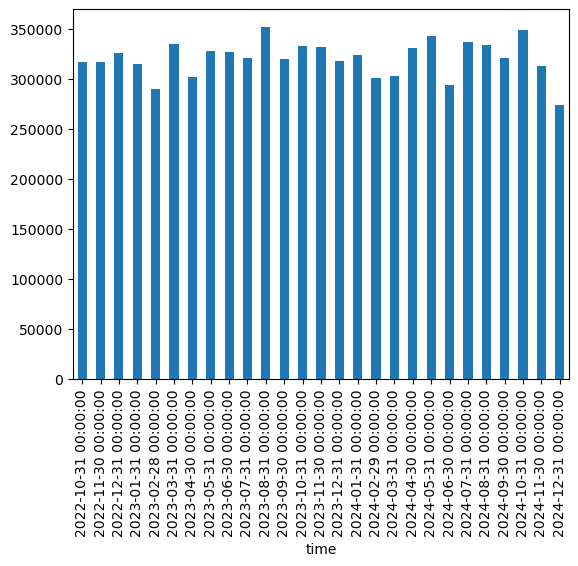

In [18]:
df_1min[['time', 'target']].groupby(pd.Grouper(key='time', freq='ME')).target.count().plot.bar()

<Axes: xlabel='time'>

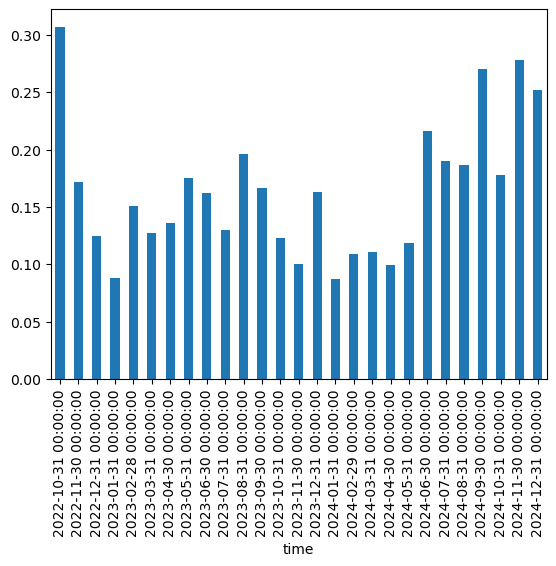

In [19]:
df_1min[['time', 'target']].groupby(pd.Grouper(key='time', freq='ME')).target.mean().plot.bar()

In [20]:
## Вот тут остановился

In [21]:
mask_train = np.array((pd.Timestamp('2023-10-01') <= df_1min['time']) & (df_1min['time'] < pd.Timestamp('2024-07-01')))
mask_valid = np.array((pd.Timestamp('2024-07-01') <= df_1min['time']) & (df_1min['time'] < pd.Timestamp('2024-09-01')))
mask_test = np.array((pd.Timestamp('2024-09-01') <= df_1min['time']) & (df_1min['time'] < pd.Timestamp('2024-11-01')))
mask_test2 = np.array((pd.Timestamp('2024-11-01') <= df_1min['time']) & (df_1min['time'] < pd.Timestamp('2024-12-25')))

In [22]:
#Оставим каждый 
# mask_freq_min = np.array(df_1min['time'].dt.minute % 30 == 0)

# mask_train &= mask_freq_min
# mask_valid &= mask_freq_min
# mask_test &= mask_freq_min
# mask_test2 &= mask_freq_min

In [23]:
mask_time = np.array((df_1min['time'].dt.time >= pd.Timestamp('11:00:00').time()) & (df_1min['time'].dt.time <= pd.Timestamp('22:00:00').time()))
# ограничение с запасом по точкам справа, да и кто после 22 торгует, а точек и так хватает

mask_train &= mask_time
mask_valid &= mask_time
mask_test &= mask_time
mask_test2 &= mask_time

mask_time.shape[0]*11/14, mask_time.sum()

(6809308.785714285, 6893354)

In [24]:
mask_train.sum(), mask_valid.sum(), mask_test.sum(), mask_test2.sum()

(2294628, 532895, 532943, 455683)

In [25]:
mask_data = mask_train|mask_valid|mask_test|mask_test2
(mask_data).sum()

3816149

In [26]:
mask_train.sum()/(mask_data).sum(), mask_valid.sum()/(mask_data).sum(), mask_test.sum()/(mask_data).sum(), mask_test2.sum()/(mask_data).sum()

(0.6012941318591072,
 0.13964208420583157,
 0.13965466233105678,
 0.11940912160400445)

In [27]:
df_1min.loc[mask_train, 'target'].mean(), df_1min.loc[mask_valid, 'target'].mean(), df_1min.loc[mask_test, 'target'].mean(), df_1min.loc[mask_test2, 'target'].mean()

(0.10318273811702812,
 0.17086292796892447,
 0.2074762216597272,
 0.25299824658808867)

In [28]:
#проверки

In [29]:
(mask_train.sum()+mask_valid.sum()+mask_test.sum()+mask_test2.sum()) ==(mask_data).sum()

True

<Axes: xlabel='time'>

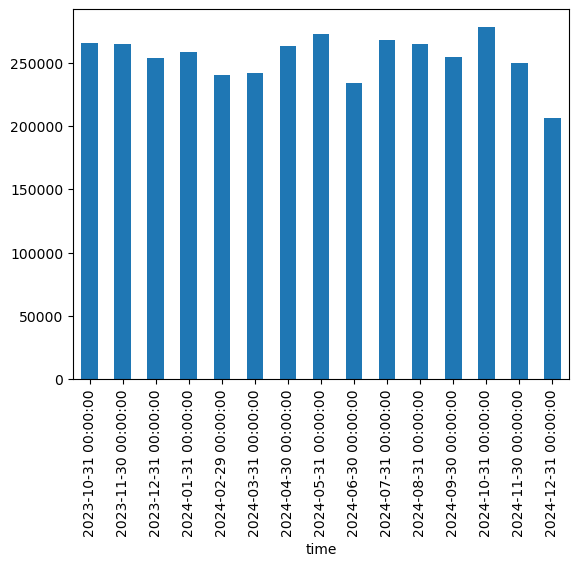

In [30]:
df_1min.loc[mask_data, ['time', 'target']].groupby(pd.Grouper(key='time', freq='ME')).target.count().plot.bar()

<Axes: xlabel='time'>

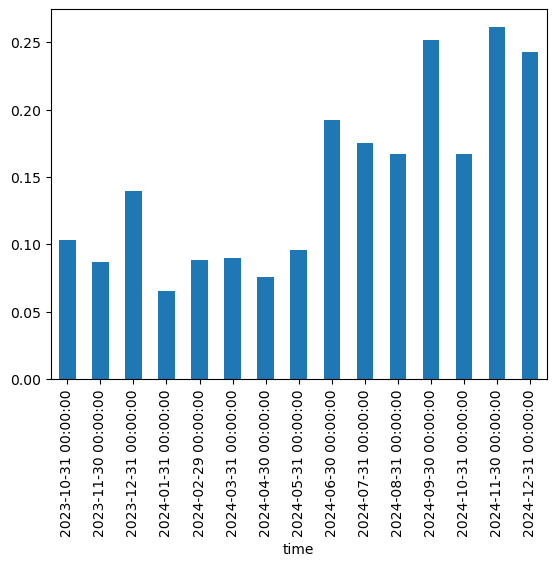

In [31]:
df_1min.loc[mask_data, ['time', 'target']].groupby(pd.Grouper(key='time', freq='ME')).target.mean().plot.bar()

In [32]:
#indexes

inds_train = df_1min.index[mask_train].values
inds_valid = df_1min.index[mask_valid].values
inds_test = df_1min.index[mask_test].values
inds_test2 = df_1min.index[mask_test2].values

In [33]:
inds_train

array([ 208535,  208536,  208537, ..., 8565790, 8565791, 8565792])

In [34]:
#проверим, что все индексы валидны
#у каждой точки должно быть 200 точек назад (минут, 5минут, часов, дней)

In [35]:
df_1min.head()

,time,close,volume,ticker,index_1min_start,index_5min,index_start_5min,index_1hour,index_start_1hour,index_1day,...,close_w30_roc,close_w30_diff,volume_w30_ma,volume_w30_std,volume_w30_min,volume_w30_max,volume_w30_rsi,volume_w30_roc,volume_w30_diff,target
index,,,,,,,,,,,,,,,,,,,,,
0,2022-10-03 10:01:00,-0.571301,11.565469,GAZP,0.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,20.327633,NaN,168.742004,2.196328,NaN,NaN,NaN,0
1,2022-10-03 10:02:00,-0.571223,8.018962,GAZP,0.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,17.210917,2.910610,118.212013,2.196328,-20.604343,NaN,NaN,0
2,2022-10-03 10:03:00,-0.571611,6.815036,GAZP,0.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,15.466660,2.857632,101.058693,2.196328,-20.604343,NaN,NaN,0
3,2022-10-03 10:04:00,-0.571810,8.013151,GAZP,0.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,15.120991,2.281113,101.058693,2.196328,-12.302465,NaN,NaN,0
4,2022-10-03 10:05:00,-0.572156,6.656116,GAZP,0.0,0.0,0.0,NaN,NaN,NaN,...,NaN,NaN,14.436558,2.178917,98.794434,2.196328,-13.844565,NaN,NaN,0


In [36]:
def check_valid_inds(inds, df_1min, len_seq=200):
    ind_1min_start = df_1min.loc[inds, 'index_1min_start'].values.astype(int)
    ind_1min_end = inds.astype(int)
    assert (~np.isnan(ind_1min_start)).all() & (~np.isnan(ind_1min_end)).all() &\
                                               ((ind_1min_end - ind_1min_start + 1) >= len_seq).all(), 'Error: 1min'

    ind_5min_start = df_1min.loc[inds, 'index_start_5min'].values.astype(int)
    ind_5min_end = df_1min.loc[inds, 'index_5min'].values.astype(int)
    assert (~np.isnan(ind_5min_start)).all() & (~np.isnan(ind_5min_end)).all() &\
                                                ((ind_5min_end - ind_5min_start + 1) >= len_seq).all(), 'Error: 5min'

    ind_1hour_start = df_1min.loc[inds, 'index_start_1hour'].values.astype(int)
    ind_1hour_end = df_1min.loc[inds, 'index_1hour'].values.astype(int)
    assert (~np.isnan(ind_1hour_start)).all() & (~np.isnan(ind_1hour_end)).all() &\
                                                ((ind_1hour_end - ind_1hour_start + 1) >= len_seq).all(), 'Error: 1hour'

    ind_1day_start = df_1min.loc[inds, 'index_start_1day'].values.astype(int)
    ind_1day_end = df_1min.loc[inds, 'index_1day'].values.astype(int)
    assert (~np.isnan(ind_1day_start)).all() & (~np.isnan(ind_1day_end)).all() &\
                                                ((ind_1day_end - ind_1day_start + 1) >= len_seq).all(), 'Error: 1day'

    return 'All Good'


In [37]:
check_valid_inds(inds_train, df_1min, len_seq=200), check_valid_inds(inds_valid, df_1min, len_seq=200), check_valid_inds(inds_test, df_1min, len_seq=200), check_valid_inds(inds_test2, df_1min, len_seq=200)

('All Good', 'All Good', 'All Good', 'All Good')

### 4. Model NINE

In [39]:
import tensorflow as tf
print("TensorFlow version:", tf.__version__)

TensorFlow version: 2.18.0


In [40]:
df_1min['ticker_code'] = df_1min['ticker'].astype('category').cat.codes

In [41]:
df_1min['ticker_code'].value_counts()

ticker_code
2     468143
11    468075
13    467832
4     466020
9     464321
17    463830
5     463346
0     463131
1     461255
12    457503
8     457442
10    453946
6     452687
7     450617
3     448262
16    443881
15    442567
18    441487
14    432048
Name: count, dtype: int64

In [42]:
df_1min['ticker_code'].max()

18

In [43]:
dict(enumerate(df_1min['ticker'].astype('category').cat.categories))

{0: 'ALRS',
 1: 'CHMF',
 2: 'GAZP',
 3: 'GMKN',
 4: 'LKOH',
 5: 'MAGN',
 6: 'MGNT',
 7: 'MTSS',
 8: 'NLMK',
 9: 'NVTK',
 10: 'OZON',
 11: 'ROSN',
 12: 'RUAL',
 13: 'SBER',
 14: 'SNGS',
 15: 'SNGSP',
 16: 'T',
 17: 'TATN',
 18: 'YDEX'}

#### 4.1 PyDataset

In [45]:
class CandleData:
    def __init__(self, df_1min, df_5min, df_1hour, df_1day):
        self.df_1min = df_1min
        self.df_5min = df_5min
        self.df_1hour = df_1hour
        self.df_1day = df_1day
        self.make_np_arr_data()

    def make_np_arr_data(self):

        #1min
        cols_arr_1min = self.df_1min.columns[~self.df_1min.columns.isin(['time', 'ticker',
                                     'index_1min_start', 'index_5min',
                                     'index_start_5min', 'index_1hour', 'index_start_1hour', 'index_1day',
                                     'index_start_1day', 
                                     'result', 'delta_time', 'res_price', 'res_ind'])]
        self.arr_1min = np.array(self.df_1min[cols_arr_1min])

        #cols index_slice
        cols_index_time_slice = ['index_1min_start',
                         'index_5min', 'index_start_5min',
                         'index_1hour', 'index_start_1hour',
                         'index_1day', 'index_start_1day']
        self.index_time_slice_1min = np.array(self.df_1min[cols_index_time_slice])

        #cols ticker
        self.ticker_code_1min = np.array(self.df_1min['ticker_code'])

        #5min
        cols_arr_5min = self.df_5min.columns[~self.df_5min.columns.isin(['time', 'ticker'])]
        self.arr_5min = np.array(self.df_5min[cols_arr_5min])

        #1hour
        cols_arr_1hour = self.df_1hour.columns[~self.df_1hour.columns.isin(['time', 'ticker'])]
        self.arr_1hour = np.array(self.df_1hour[cols_arr_1hour])

        #1day
        cols_arr_1day = self.df_1day.columns[~self.df_1day.columns.isin(['time', 'ticker'])]
        self.arr_1day = np.array(self.df_1day[cols_arr_1day])

        #target
        self.target_1min = df_1min['target'].values


class dataset(tf.keras.utils.PyDataset):

    def __init__(self, data, inds, count_samples=None, len_seq=200,  batch_size=32, shuffle=False, **kwargs):
        super().__init__(**kwargs)
        self.data = data
        self.inds = inds
        self.len_seq = len_seq
        self.batch_size = batch_size

        self.count_samples = count_samples
        if self.count_samples is not None:
            self.inds = np.random.RandomState(seed=42).permutation(self.inds)

        self.shuffle = shuffle
        if self.shuffle:
            self.inds = np.random.permutation(self.inds)

    def __len__(self):
        # Return number of batches.
        if self.count_samples is None:
            return math.ceil(len(self.inds) / self.batch_size)
        else:
            return math.ceil(self.count_samples / self.batch_size)

    def __getitem__(self, idx):
        # Return x, y for batch idx.
        low = idx * self.batch_size
        # Cap upper bound at array length; the last batch may be smaller
        # if the total number of items is not a multiple of batch size.
        high = min(low + self.batch_size, len(self.inds))
        batch_inds = self.inds[low:high]


        x_batch = []
        x_batch_ticker_code = []
        y_batch = []

        for i in batch_inds:
            # cols_index_time_slice = ['index_1min_start',
            #              'index_5min', 'index_start_5min',
            #              'index_1hour', 'index_start_1hour',
            #              'index_1day', 'index_start_1day']
            #1min
            ind_high_1min = i+1
            ind_low_1min = int(ind_high_1min - self.len_seq)
            tensor_1min = self.data.arr_1min[ind_low_1min:ind_high_1min, :]

            
            #5min
            ind_high_5min = int(self.data.index_time_slice_1min[i, 1] + 1)
            ind_low_5min = int(ind_high_5min - self.len_seq)
            tensor_5min = self.data.arr_5min[ind_low_5min:ind_high_5min, :]

            #1hour
            ind_high_1hour = int(self.data.index_time_slice_1min[i, 3] + 1)
            ind_low_1hour = int(ind_high_1hour - self.len_seq)
            tensor_1hour = self.data.arr_1hour[ind_low_1hour:ind_high_1hour, :]

            #1day
            ind_high_1day = int(self.data.index_time_slice_1min[i, 5] + 1)
            ind_low_1day =  int(ind_high_1day - self.len_seq)
            tensor_1day = self.data.arr_1day[ind_low_1day:ind_high_1day, :]

            #target
            y = self.data.target_1min[i]

            #ticker
            ticker_code = self.data.ticker_code_1min[i]


            x = np.concatenate((tensor_1min, tensor_5min, tensor_1hour, tensor_1day), axis=1)

            x_batch += [x]
            x_batch_ticker_code += [ticker_code]
            y_batch += [y]

        #return {'input_numeric':  np.array(x_batch), 'input_ticker' : np.array(x_batch_ticker_code)}, np.array(y_batch)
        return np.array(x_batch), np.array(y_batch)


    def on_epoch_end(self):
        if self.shuffle:
            self.inds = np.random.permutation(self.inds)

In [46]:
mask_train.sum(), mask_valid.sum(), mask_test.sum(), mask_test2.sum()

(2294628, 532895, 532943, 455683)

In [47]:
mask_train.sum() // 64

35853

In [48]:
data = CandleData(df_1min, df_5min, df_1hour, df_1day)


dataset_train = dataset(data, inds_train, count_samples=64*500, len_seq=200, batch_size=64, shuffle=True)
dataset_valid = dataset(data, inds_valid, count_samples=64*100, len_seq=200, batch_size=64, shuffle=False)
dataset_test = dataset(data, inds_test, count_samples=64*100, len_seq=200, batch_size=64, shuffle=False)
dataset_test2 = dataset(data, inds_test2, count_samples=64*100, len_seq=200, batch_size=64, shuffle=False)

In [49]:
len(dataset_train), len(dataset_valid), len(dataset_test), len(dataset_test2)

(500, 100, 100, 100)

In [50]:
len(dataset_train)*dataset_train.batch_size, len(dataset_valid)*dataset_valid.batch_size, len(dataset_test)*dataset_test.batch_size, len(dataset_test2)*dataset_test2.batch_size

(32000, 6400, 6400, 6400)

In [51]:
# #
# dataset_train_subsample = dataset(data, inds_train, count_samples=1000, len_seq=200, batch_size=64, shuffle=True)
# dataset_valid_subsample = dataset(data, inds_valid, count_samples=1000, len_seq=200, batch_size=64, shuffle=True)
# dataset_test_subsample = dataset(data, inds_test, count_samples=1000, len_seq=200, batch_size=64, shuffle=True)
# dataset_test2_subsample = dataset(data, inds_test2, count_samples=1000, len_seq=200, batch_size=64, shuffle=False)

#### 4.2 Model

In [53]:
import math
import numpy as np
import pandas as pd

import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.layers import Input, Dense, Dropout, LayerNormalization, MultiHeadAttention, Add, GlobalAveragePooling1D



def transformer_encoder(inputs, head_size, num_heads, ff_dim, dropout=0):
    # Attention and Normalization
    x = LayerNormalization(epsilon=1e-6)(inputs)
    x = MultiHeadAttention(key_dim=head_size, num_heads=num_heads, dropout=dropout)(x, x)
    x = Add()([x, inputs])

    # Feed Forward Part
    y = LayerNormalization(epsilon=1e-6)(x)
    y = Dense(ff_dim, activation="relu")(y)
    y = Dropout(dropout)(y)
    y = Dense(inputs.shape[-1])(y)
    return Add()([y, x])


def build_transformer_model(input_shape, head_size, num_heads, ff_dim, num_layers, dropout=0):
    inputs = Input(shape=input_shape)
    x = inputs
    for _ in range(num_layers):
        x = transformer_encoder(x, head_size, num_heads, ff_dim, dropout)
    x = GlobalAveragePooling1D()(x)
    x = LayerNormalization(epsilon=1e-6)(x)
    outputs = Dense(1, activation="sigmoid")(x)
    return Model(inputs=inputs, outputs=outputs)


# def build_transformer_model(input_shape, head_size, num_heads, ff_dim, num_layers, dropout=0):
#     input_num = tf.keras.layers.Input(shape=input_shape, name='input_numeric')

#     ticker_size = 18 #count of stocks
#     input_emb = tf.keras.layers.Input(shape=(1,), name='input_ticker')
#     emb = tf.keras.layers.Embedding(ticker_size, 5) (input_emb)
#     emb_reshaped = tf.keras.layers.Reshape(target_shape=(5,))(emb)
#     emb_reshaped_repeat = tf.keras.layers.RepeatVector(input_shape[0])(emb_reshaped)

#     x = tf.keras.layers.concatenate([input_num, emb_reshaped_repeat])

#     for _ in range(num_layers):
#         x = transformer_encoder(x, head_size, num_heads, ff_dim, dropout)
#     x = GlobalAveragePooling1D()(x)
#     x = LayerNormalization(epsilon=1e-6)(x)

#     outputs = Dense(1, activation="sigmoid")(x)

#     return Model(inputs=[input_num, input_emb], outputs=outputs)

# def build_transformer_model(input_shape, head_size, num_heads, ff_dim, num_layers, dropout=0):
#     input_num = tf.keras.layers.Input(shape=input_shape, name='input_numeric')



#     x = input_num

#     for _ in range(num_layers):
#         x = transformer_encoder(x, head_size, num_heads, ff_dim, dropout)
#     x = GlobalAveragePooling1D()(x)
#     x = LayerNormalization(epsilon=1e-6)(x)


#     ticker_size = 18 #count of stocks
#     input_emb = tf.keras.layers.Input(shape=(1,), name='input_ticker')
#     emb = tf.keras.layers.Embedding(ticker_size, 4) (input_emb)
#     emb = tf.keras.layers.Reshape(target_shape=(4,))(emb)

#     x = tf.keras.layers.concatenate([x, emb])

#     outputs = Dense(1, activation="sigmoid")(x)

#     return Model(inputs=[input_num, input_emb], outputs=outputs)

#### 4.3 WarmUpCosineDecay

In [55]:
from tensorflow import keras

def lr_warmup_cosine_decay(global_step,
                           warmup_steps,
                           hold = 0,
                           total_steps=0,
                           start_lr=0.0,
                           target_lr=1e-3):
    # Cosine decay
    # There is no tf.pi so we wrap np.pi as a TF constant
    #learning_rate = 0.5 * target_lr * (1 + tf.cos(tf.constant(np.pi) * (global_step - warmup_steps - hold) / float(total_steps - warmup_steps - hold)))
    learning_rate = 0.5 * target_lr * (1 + tf.cos(tf.constant(np.pi) * tf.cast((global_step - warmup_steps - hold), tf.float32) / tf.cast(total_steps - warmup_steps - hold, tf.float32)))


    # Target LR * progress of warmup (=1 at the final warmup step)
    warmup_lr = target_lr * (global_step / warmup_steps)

    # Choose between `warmup_lr`, `target_lr` and `learning_rate` based on whether `global_step < warmup_steps` and we're still holding.
    # i.e. warm up if we're still warming up and use cosine decayed lr otherwise
    if hold > 0:
        learning_rate = tf.where(global_step > warmup_steps + hold,
                                 learning_rate, target_lr)

    learning_rate = tf.where(global_step < warmup_steps, warmup_lr, learning_rate)

    return learning_rate


class WarmUpCosineDecay(keras.optimizers.schedules.LearningRateSchedule):
    def __init__(self, start_lr, target_lr, warmup_steps, total_steps, hold):
        super().__init__()
        self.start_lr = start_lr
        self.target_lr = target_lr
        self.warmup_steps = warmup_steps
        self.total_steps = total_steps
        self.hold = hold

    def __call__(self, step):
        lr = lr_warmup_cosine_decay(global_step=step,
                                    total_steps=self.total_steps,
                                    warmup_steps=self.warmup_steps,
                                    start_lr=self.start_lr,
                                    target_lr=self.target_lr,
                                    hold=self.hold)

        return tf.where(
            step > self.total_steps, 0.0, lr, name="learning_rate"
        )
    def get_config(self):
        config = {
          'start_lr': self.start_lr,
          'target_lr': self.target_lr,
          'warmup_steps': self.warmup_steps,
          'total_steps': self.total_steps,
          'hold': self.hold
        }
        return config



#### 4.4 Callbacks

In [57]:
# метрики на конец эпохи

In [58]:
def get_y_true(data):
    return data.data.target_1min[data.inds[:len(data)*data.batch_size]]

def precision(y_true, y_pred, threshold):
    mask = y_pred.ravel() > threshold
    return mask.sum(), y_true.ravel()[mask].mean()



class MetricsCallback(keras.callbacks.Callback):
    def __init__(self, datasets):
        self.datasets = datasets
        self.list_auc = []
        self.list_auc_95 = []
        self.list_precision = []
        self.list_precision_5 = []
        # self.list_percent = []
        # self.list_count = []
        super(MetricsCallback, self).__init__()

    def on_epoch_end(self, epoch, logs=None):

        list_y_true = []
        list_y_pred = []

        list_auc = []
        list_auc_95 = []
        list_precision = []
        list_precision_5 = []
        # list_count = []
        # list_percent = []
        for dataset in self.datasets:
            y_true = get_y_true(dataset)
            y_pred = self.model.predict(dataset)

            list_auc += [roc_auc_score(y_true, y_pred)]
            
            #auc_95
            threshold = np.quantile(y_pred, q=0.95)
            mask = y_pred.ravel() > threshold
            list_auc_95 += [roc_auc_score(y_true.ravel()[mask], y_pred.ravel()[mask])]

            #precision
            threshold = np.quantile(y_pred, q=0.99)
            mask = y_pred.ravel() > threshold
            list_precision += [y_true.ravel()[mask].mean()]

            threshold = np.quantile(y_pred, q=0.95)
            mask = y_pred.ravel() > threshold
            list_precision_5 += [y_true.ravel()[mask].mean()]

#evaluate using one threshold
        # for dataset in self.datasets:
        #     y_true = get_y_true(dataset)
        #     y_pred = self.model.predict(dataset)

        #     list_y_true += [y_true]
        #     list_y_pred += [y_pred]


        # threshold = np.quantile(list_y_pred[1], q=0.99)

        # for y_true, y_pred in zip(list_y_true, list_y_pred):
        #     list_auc += [roc_auc_score(y_true, y_pred)]

        #     mask = y_pred.ravel() > threshold
        #     list_precision += [y_true.ravel()[mask].mean()]
        #     list_count += [mask.sum()]
        #     list_percent += [mask.mean()]

        # del list_y_true, list_y_pred
        # gc.collect()



        self.list_auc += [list_auc.copy()]
        self.list_auc_95 += [list_auc_95.copy()]
        self.list_precision += [list_precision.copy()]
        self.list_precision_5 += [list_precision_5.copy()]
        # self.list_percent += [list_percent.copy()]
        # self.list_count += [list_count.copy()]


        print('AUC_ROC: ', np.round(list_auc, decimals=3).tolist())
        print('AUC_ROC_95: ', np.round(list_auc_95, decimals=3).tolist())
        # print('COUNT: ', np.round(list_count, decimals=3).tolist())
        # print('PERCENT: ', np.round(list_percent, decimals=3).tolist())
        print('PRECISION: ', np.round(list_precision, decimals=3).tolist())
        #print('PRECISION_5: ', np.round(list_precision_5, decimals=3).tolist())

        print()




#### 4.5 Train

In [61]:
! mkdir models

mkdir: models: File exists


In [62]:
dataset_train.__getitem__(0)[0][0].shape

(200, 166)

In [63]:
input_shape = dataset_train.__getitem__(0)[0][0].shape
head_size = 128#256
num_heads = 8#16
ff_dim = 512#1024
num_layers = 2#12
dropout = 0.1#0.2 #лучше ноль

model = build_transformer_model(input_shape, head_size, num_heads, ff_dim, num_layers, dropout)
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 200, 166)  │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ layer_normalization │ (None, 200, 166)  │        332 │ input_layer[0][0] │
│ (LayerNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ multi_head_attenti… │ (None, 200, 166)  │    683,174 │ layer_normalizat… │
│ (MultiHeadAttentio… │                   │            │ layer_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add (Add)           │ (None, 200, 166)  │          0 │ multi_head_atten… │
│                     │                   │            │ input_layer[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ layer_normalizatio… │ (None, 200, 166)  │        332 │ add[0][0]         │
│ (LayerNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense (Dense)       │ (None, 200, 512)  │     85,504 │ layer_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_1 (Dropout) │ (None, 200, 512)  │          0 │ dense[0][0]       │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_1 (Dense)     │ (None, 200, 166)  │     85,158 │ dropout_1[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_1 (Add)         │ (None, 200, 166)  │          0 │ dense_1[0][0],    │
│                     │                   │            │ add[0][0]         │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ layer_normalizatio… │ (None, 200, 166)  │        332 │ add_1[0][0]       │
│ (LayerNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ multi_head_attenti… │ (None, 200, 166)  │    683,174 │ layer_normalizat… │
│ (MultiHeadAttentio… │                   │            │ layer_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_2 (Add)         │ (None, 200, 166)  │          0 │ multi_head_atten… │
│                     │                   │            │ add_1[0][0]       │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ layer_normalizatio… │ (None, 200, 166)  │        332 │ add_2[0][0]       │
│ (LayerNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_2 (Dense)     │ (None, 200, 512)  │     85,504 │ layer_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_3 (Dropout) │ (None, 200, 512)  │          0 │ dense_2[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_3 (Dense)     │ (None, 200, 166)  │     85,158 │ dropout_3[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_3 (Add)         │ (None, 200, 166)  │          0 │ dense_3[0][0],    │
│                     │                   │            │ add_2[0][0]       │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ global_average_poo… │ (None, 166)       │          0 │ add_3[0][0]       │
│ (GlobalAveragePool… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ layer_normalizatio… │ (None, 166)       │        332 │ global_average_p

 Total params: 1,709,499 (6.52 MB)

 Trainable params: 1,709,499 (6.52 MB)

 Non-trainable params: 0 (0.00 B)

In [64]:
#dataset_train = dataset(data, inds_train, count_samples=None, len_seq=200, batch_size=64, shuffle=True)

In [65]:
EPOCHS = 20

total_steps = len(dataset_train) * EPOCHS
warmup_steps = int(0.1*total_steps)
schedule = WarmUpCosineDecay(start_lr=0.0001, target_lr=0.001, warmup_steps=warmup_steps, total_steps=total_steps, hold=0)
#may be changed to 1
optimizer=tf.keras.optimizers.Adam(learning_rate=schedule)
#optimizer=tf.keras.optimizers.Adam(learning_rate=0.001)

loss = tf.keras.losses.BinaryCrossentropy()
metric_auc_roc = tf.keras.metrics.AUC(num_thresholds=64)


model.compile(optimizer=optimizer,
              loss=loss,
              metrics=[metric_auc_roc])


#metrics_callback = MetricsCallback([dataset_train_subsample, dataset_valid_subsample, dataset_test_subsample, dataset_test2_subsample])
metrics_callback = MetricsCallback([dataset_train, dataset_valid, dataset_test, dataset_test2])
save_callback = tf.keras.callbacks.ModelCheckpoint( "./models/model_{epoch:04d}.keras", save_freq='epoch')
callbacks = [save_callback, metrics_callback]




In [66]:
# lrs = [lr_warmup_cosine_decay(step, total_steps=total_steps, warmup_steps=warmup_steps, hold=0, start_lr=0.0001,
#                            target_lr=0.001) for step in tqdm(np.arange(total_steps))]
# plt.plot(lrs)

In [67]:
1

1

In [68]:
model.fit(dataset_train, epochs=EPOCHS, callbacks=callbacks)

Epoch 1/20
 13/500 ━━━━━━━━━━━━━━━━━━━━ 9:06 1s/step - auc: 0.4354 - loss: 0.4676

KeyboardInterrupt: 

In [ ]:
df_auc = pd.DataFrame(metrics_callback.list_auc)
df_precision = pd.DataFrame(metrics_callback.list_precision)
# df_count = pd.DataFrame(metrics_callback.list_count)
# df_percent = pd.DataFrame(metrics_callback.list_percent)

In [ ]:
#df_count

In [ ]:
df_precision

In [ ]:
df_auc

In [ ]:
#df_percent

# 4. Evaluate

In [122]:
import keras

model_ld = keras.saving.load_model('./model_0004.keras',
                                custom_objects={'WarmUpCosineDecay': WarmUpCosineDecay})

In [125]:
dataset_valid = dataset(data, inds_valid, len_seq=200, batch_size=64, shuffle=False)
dataset_test = dataset(data, inds_test, len_seq=200, batch_size=64, shuffle=False)
dataset_test2 = dataset(data, inds_test2, len_seq=200, batch_size=64, shuffle=False)

In [127]:
(dataset_valid.inds == inds_valid).all(), (dataset_test.inds == inds_test).all(), (dataset_test2.inds == inds_test2).all()

(True, True, True)

In [129]:
y_pred_valid = model_ld.predict(dataset_valid)
y_pred_test = model_ld.predict(dataset_test)
y_pred_test2 = model_ld.predict(dataset_test2)

I0000 00:00:1735160835.599362 11211310 service.cc:148] XLA service 0x60000254eb00 initialized for platform Host (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1735160835.599394 11211310 service.cc:156]   StreamExecutor device (0): Host, Default Version
2024-12-26 00:07:15.622979: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1735160835.856115 11211310 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


147/147 ━━━━━━━━━━━━━━━━━━━━ 62s 419ms/step
152/152 ━━━━━━━━━━━━━━━━━━━━ 69s 452ms/step
210/210 ━━━━━━━━━━━━━━━━━━━━ 97s 462ms/step


In [130]:
dump_pkl(y_pred_valid, 'y_pred_valid.pkl')
dump_pkl(y_pred_test, 'y_pred_test.pkl')
dump_pkl(y_pred_test2, 'y_pred_test2.pkl')


In [ ]:
y1 = model.predict(dataset_test2_subsample)
y2 = model_ld.predict(dataset_test2_subsample)
np.unique(y1-y2)

# TMP

In [ ]:
import tensorflow as tf
tf.keras.backend.floatx()